In [1]:
import os
from os.path import expanduser
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get signal prediction results
signal_results_files = [
    "YeastSTATES-CRISPR-Short-Duration-Time-Series-20191208_20200610192131.csv",
    "YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200625205807.csv"
]
all_pred_df = pd.DataFrame()
for pred_file in signal_results_files:
    pred_df = pd.read_csv(pred_file, index_col=0).reset_index()
    #pred_df["experiment_id"] = pred_file.split("_fc_")[0]
    all_pred_df = all_pred_df.append(pred_df, ignore_index=True)
    
all_pred_df 

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,TX_plate_name,TX_project_name,TX_sample_name,_id,aliquot_id,cells/mL,control_type,date_of_experiment,experiment_id,experiment_reference,...,standard_type,strain,strain_class,strain_name,temperature,temperature_unit,timepoint,timepoint_unit,total_counts,well
0,TimeSeries-12-11-2019-Run1P1,Sytox-YeastGates,SytoxYG-Plate,5e74fcffd3add00ff38d733b,aq1dvh7dssh7ewe,4.500000e+02,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,SpheroControl,Process,Fluorescent_beads,30.0,celsius,18.0,hour,27,f2
1,TimeSeries-12-11-2019-Run1P1,Sytox-YeastGates,SytoxYG-Plate,5e74fd1ba3b44b40d9568234,aq1dvh7dssbhf98,9.166667e+02,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,beads_spherotech_pps_6K,Process,Sizing_beads,30.0,celsius,18.0,hour,55,e2
2,TimeSeries-12-11-2019-Run1P2,Sytox-YeastGates,SytoxYG-Plate,5e7502d723b9a6ed388174f7,aq1dvhgvrhhf3gj,3.387167e+05,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,SpheroControl,Process,Fluorescent_beads,30.0,celsius,20.0,hour,20323,f2
3,TimeSeries-12-11-2019-Run1P2,Sytox-YeastGates,SytoxYG-Plate,5e74ffc980408659f9a161c6,aq1dvhgvrhamvqg,1.639167e+05,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,beads_spherotech_pps_6K,Process,Sizing_beads,30.0,celsius,20.0,hour,9835,e2
4,TimeSeries-12-11-2019-Run1P3,Sytox-YeastGates,SytoxYG-Plate,5e74fda2c05815244ace28b7,aq1dvhtnnh2kdb9,3.372000e+05,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,SpheroControl,Process,Fluorescent_beads,30.0,celsius,22.0,hour,20232,f2
5,TimeSeries-12-11-2019-Run1P3,Sytox-YeastGates,SytoxYG-Plate,5e74fe1b279337c2a7aa1153,aq1dvhtnnguwdp3,1.653167e+05,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,beads_spherotech_pps_6K,Process,Sizing_beads,30.0,celsius,22.0,hour,9919,e2
6,TimeSeries-12-11-2019-Run1P4,Sytox-YeastGates,SytoxYG-Plate,5e74fe5c1339c26e49c9c472,aq1dvj68hhw8abj,3.771667e+05,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,SpheroControl,Process,Fluorescent_beads,30.0,celsius,24.0,hour,22630,f2
7,TimeSeries-12-11-2019-Run1P4,Sytox-YeastGates,SytoxYG-Plate,5e74fd7537827b21162fa0ea,aq1dvj68hhpe4je,1.971167e+05,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,beads_spherotech_pps_6K,Process,Sizing_beads,30.0,celsius,24.0,hour,11827,e2
8,TimeSeries-12-11-2019-Run1P1,Sytox-YeastGates,SytoxYG-Plate,5e6c02528859561b561e3e19,aq1dvh7dsr6754b,6.521739e+05,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,UWBF_24926,Experiment,CRISPR_CEN.PK2_24926,30.0,celsius,18.0,hour,30000,a3
9,TimeSeries-12-11-2019-Run1P1,Sytox-YeastGates,SytoxYG-Plate,5e6c0914e766fe93eaa7318e,aq1dvh7dsr67549,3.575000e+04,NaN,11-Dec-2019,experiment.transcriptic.r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,...,NaN,UWBF_23970,Control,CRISPR_CEN.PK2_negative_control_23970,30.0,celsius,18.0,hour,2145,a2


In [3]:
all_pred_df[['strain_name', 'strain']].drop_duplicates()

,strain_name,strain
0,Fluorescent_beads,SpheroControl
1,Sizing_beads,beads_spherotech_pps_6K
8,CRISPR_CEN.PK2_24926,UWBF_24926
9,CRISPR_CEN.PK2_negative_control_23970,UWBF_23970
10,CRISPR_CEN.PK2_24961,UWBF_24961
12,CRISPR_CEN.PK2_24959,UWBF_24959
13,CRISPR_w303_positive_control_NOR_00_6390,UWBF_6390
17,CRISPR_CEN.PK2_24952,UWBF_24952
22,CRISPR_CEN.PK2_inducible_FP_25784,UWBF_25784
23,CRISPR_CEN.PK2_24962,UWBF_24962


In [4]:
all_pred_filtered_df = all_pred_df[['strain', 'inducer_concentration', 'timepoint', 'experiment_reference', 'experiment_id', 'well', 'predicted_output_mean', 'predicted_output_std']]

## Get the first 18 and 24 timepoints
all_pred_filtered_df = all_pred_filtered_df.loc[(all_pred_filtered_df.timepoint == 18.0) | (all_pred_filtered_df.timepoint == 24.0)]

## Compute difference in prediction between 18 and 24 timepoints
pred_18 = all_pred_filtered_df.loc[(all_pred_filtered_df.timepoint == 18.0)].set_index(['strain', 'inducer_concentration', 'experiment_id', 'well', 'experiment_reference'])
pred_24 = all_pred_filtered_df.loc[(all_pred_filtered_df.timepoint == 24.0)].set_index(['strain', 'inducer_concentration', 'experiment_id', 'well', 'experiment_reference'])
assert(len(pred_18) == len(pred_24))

diff = abs(pred_24['predicted_output_mean']-pred_18['predicted_output_mean'])
diff = diff.reset_index()
mean_std = pred_24['predicted_output_std']+pred_18['predicted_output_std']/2.0
mean_std = mean_std.reset_index()

mean_diff = diff.groupby(['strain', 'inducer_concentration', 'experiment_reference'])['predicted_output_mean'].agg(np.mean).reset_index()
mean_diff
mean_std = mean_std.groupby(['strain', 'inducer_concentration', 'experiment_reference'])['predicted_output_std'].agg(np.mean).reset_index()
mean_std

mean_diff = mean_diff.merge(mean_std, on=["strain", "inducer_concentration", "experiment_reference"])
mean_diff

,strain,inducer_concentration,experiment_reference,predicted_output_mean,predicted_output_std
0,SpheroControl,0.000000,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,0.183989,0.611014
1,UWBF_23970,0.000000,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,0.067853,0.524050
2,UWBF_23970,0.000040,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,0.002748,0.066585
3,UWBF_23970,0.000080,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,0.005108,0.079217
4,UWBF_23970,0.000200,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,0.000985,0.091659
5,UWBF_24864,0.000000,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,0.065573,0.344280
6,UWBF_24864,0.000004,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,0.005481,0.119235
7,UWBF_24864,0.000025,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,0.015800,0.128188
8,UWBF_24864,0.000060,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,0.013708,0.175822
9,UWBF_24926,0.000000,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,0.090055,0.253184


In [5]:
mean_diff.strain.unique()

array(['SpheroControl', 'UWBF_23970', 'UWBF_24864', 'UWBF_24926',
       'UWBF_24952', 'UWBF_24959', 'UWBF_24960', 'UWBF_24961',
       'UWBF_24962', 'UWBF_24963', 'UWBF_25784', 'UWBF_32302',
       'UWBF_6390', 'beads_spherotech_pps_6K', 'beads_spherotech_rainbow'],
      dtype=object)

In [6]:
# Get Wasserstein results

wass_results_files = glob.glob("*fc_raw*diff_summary*csv")
all_wass_df = pd.DataFrame()
for wass_file in wass_results_files:
    wass_df = pd.read_csv(wass_file, index_col=0).reset_index().dropna().rename(columns={"index": "case"})
    wass_df["experiment_reference"] = "_".join(wass_file.split("_fc_")[0].split("_")[1:-1])
    all_wass_df = all_wass_df.append(wass_df, ignore_index=True)
    
all_wass_df["strain"] = all_wass_df.apply(lambda x: eval(x['case'])[0], axis=1) 
all_wass_df["inducer_concentration"] = all_wass_df.apply(lambda x: eval(x['case'])[1], axis=1).astype(float)
all_wass_df = all_wass_df.drop(columns=["case"])

all_wass_df.strain.unique()

array(['SpheroControl', 'UWBF_23970', 'UWBF_24864', 'UWBF_24926',
       'UWBF_24952', 'UWBF_24959', 'UWBF_24960', 'UWBF_24961',
       'UWBF_24962', 'UWBF_24963', 'UWBF_25784', 'UWBF_32302',
       'UWBF_6390', 'beads_spherotech_pps_6K', 'beads_spherotech_rainbow'],
      dtype=object)

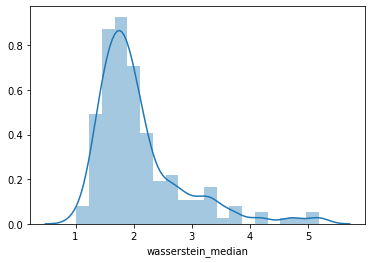

In [7]:
sns.distplot(all_wass_df.wasserstein_median)

In [9]:
strains_to_drop = ['SpheroControl', 'beads_spherotech_pps_6K', 'beads_spherotech_rainbow', 
                   'UWBF_23970', 'UWBF_6390', 'UWBF_25784', 'UWBF_32302', 'UWBF_24864']


Text(0, 0.5, 'Mean Difference in Proportion high/total events')

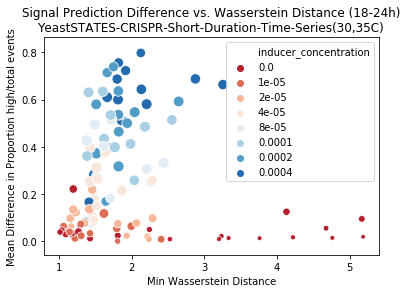

In [11]:
merged_df = all_wass_df.merge(mean_diff, on=['experiment_reference', 'strain', 'inducer_concentration'])
merged_df = merged_df[~merged_df.strain.isin(strains_to_drop)]
merged_df['inducer_concentration'] = merged_df['inducer_concentration'].round(5)
#merged_df = merged_df.loc[(merged_df.predicted_output_mean > 0.2) |  (merged_df.wasserstein_median < 3) ]
#merged_df = merged_df.loc[merged_df.inducer_concentration > 0.0]
#merged_df = merged_df.loc[(merged_df.predicted_output_mean < 0.1) &  (merged_df.wasserstein_median > 3) & (merged_df.inducer_concentration > 0.0)]
#sns.regplot(merged_df.wasserstein_median, merged_df.predicted_output_mean)

## The lower variance samples tend to disagree 
sns.scatterplot(merged_df.wasserstein_min, merged_df.predicted_output_mean, s=200*merged_df.predicted_output_std, hue=merged_df.inducer_concentration, legend='full', palette=sns.color_palette("RdBu", n_colors=8))
plt.title("Signal Prediction Difference vs. Wasserstein Distance (18-24h)\nYeastSTATES-CRISPR-Short-Duration-Time-Series(30,35C)")
plt.xlabel("Min Wasserstein Distance")
plt.ylabel("Mean Difference in Proportion high/total events")

Text(0, 0.5, 'Mean Difference in Proportion high/total events')

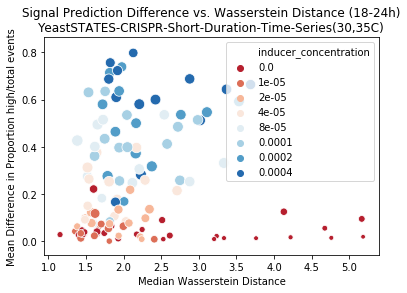

In [14]:
merged_df = all_wass_df.merge(mean_diff, on=['experiment_reference', 'strain', 'inducer_concentration'])
merged_df = merged_df[~merged_df.strain.isin(strains_to_drop)]
merged_df['inducer_concentration'] = merged_df['inducer_concentration'].round(5)
#merged_df = merged_df.loc[(merged_df.predicted_output_mean > 0.2) |  (merged_df.wasserstein_median < 3) ]
#merged_df = merged_df.loc[merged_df.inducer_concentration > 0.0]
#merged_df = merged_df.loc[(merged_df.predicted_output_mean < 0.1) &  (merged_df.wasserstein_median > 3) & (merged_df.inducer_concentration > 0.0)]
#sns.regplot(merged_df.wasserstein_median, merged_df.predicted_output_mean)

## The lower variance samples tend to disagree 
sns.scatterplot(merged_df.wasserstein_median, merged_df.predicted_output_mean, s=200*merged_df.predicted_output_std, hue=merged_df.inducer_concentration, legend='full', palette=sns.color_palette("RdBu", n_colors=8))
plt.title("Signal Prediction Difference vs. Wasserstein Distance (18-24h)\nYeastSTATES-CRISPR-Short-Duration-Time-Series(30,35C)")
plt.xlabel("Median Wasserstein Distance")
plt.ylabel("Mean Difference in Proportion high/total events")

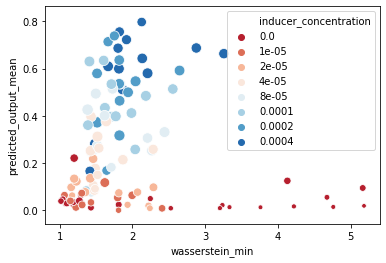

In [10]:
merged_df = all_wass_df.merge(mean_diff, on=['experiment_reference', 'strain', 'inducer_concentration'])
merged_df = merged_df[~merged_df.strain.isin(strains_to_drop)]
merged_df['inducer_concentration'] = merged_df['inducer_concentration'].round(5)
#merged_df = merged_df.loc[(merged_df.predicted_output_mean > 0.2) |  (merged_df.wasserstein_median < 3) ]
#merged_df = merged_df.loc[merged_df.inducer_concentration > 0.0]
#merged_df = merged_df.loc[(merged_df.predicted_output_mean < 0.1) &  (merged_df.wasserstein_median > 3) & (merged_df.inducer_concentration > 0.0)]
#sns.regplot(merged_df.wasserstein_median, merged_df.predicted_output_mean)

## The lower variance samples tend to disagree 
plot = sns.scatterplot(merged_df.wasserstein_min, merged_df.predicted_output_mean, s=200*merged_df.predicted_output_std, hue=merged_df.inducer_concentration, legend='full', palette=sns.color_palette("RdBu", n_colors=8))


In [16]:
merged_df.loc[(merged_df.predicted_output_mean < 0.2) &  (merged_df.wasserstein_median > 4) ]
#merged_df

,wasserstein_min,wasserstein_median,wasserstein_max,experiment_reference,strain,inducer_concentration,predicted_output_mean,predicted_output_std
83,5.182734,5.182734,5.182734,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,UWBF_24926,0.0,0.019593,0.107548
84,4.673591,4.673591,4.673591,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,UWBF_24926,0.0,0.055713,0.164030
92,4.760308,4.760308,4.760308,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,UWBF_24952,0.0,0.015045,0.119782
93,4.218812,4.218812,4.218812,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,UWBF_24952,0.0,0.017239,0.128271
119,5.165200,5.165200,5.165200,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,UWBF_24961,0.0,0.095151,0.225129
120,4.129357,4.129357,4.129357,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,UWBF_24961,0.0,0.125465,0.272602
